In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
A = wine.data

In [5]:
n = wine.data.shape[0]
d = wine.data.shape[1]

In [6]:
y = 1.0*np.ones([A.shape[0],])

In [7]:
for i in range(wine.target.shape[0]):
  if wine.target[i] != 1:
    y[i] = -1

In [8]:
indexarr = np.arange(n)
np.random.shuffle(indexarr)

In [9]:
print(indexarr)

[126  30 167  76  35 122  99 171  69  61 140  90  85  33  24 155 146  68
 129   9 170 156 176  22 148  49  21  70  62 111  45 119 174  74  72 106
   0 133  65  89 154  64 150 137 134  43  51  92  42  73  87   1 115 157
 128   2  98  78  39 112  52  16  60 124 104 116  84   8 109 125  71  27
  19  37 132 151  58  82  83  11  44 130 100 114   5 103  46  34  36  15
 108  54  55 127 110 135 168  41 144  57  94 169  12 152 105  28 123 175
 138 101  31 163  59 118  20 121 158  40 173 142  17  93  79  38   6  88
 136 153  96 143 139 177 113 145  47 165  10 141   4  81  97 149   3  53
 120 147  66  32  29 164  13 172  80  95   7  75  48  77  26  86 159  14
  63 161 166  18 107 102 160  91 117  50  67  25  56  23 131 162]


In [10]:
train_data = np.ones([int(len(indexarr)*0.8),A.shape[1]])

In [11]:
for i in range(int(len(indexarr)*0.8)):
  train_data[i] = A[indexarr[i]]

In [12]:
test_data = np.ones([int(len(indexarr)*0.2),A.shape[1]])

for i in range(int(len(indexarr)*0.2)):
  test_data[i] = A[indexarr[i + int(len(indexarr)*0.8)]]

In [13]:
train_label = np.ones([int(len(indexarr)*0.8),])

In [14]:
for i in range(int(len(indexarr)*0.8)):
  train_label[i] = y[indexarr[i]]

In [15]:
test_label = np.ones([int(len(indexarr)*0.2),])

for i in range(int(len(indexarr)*0.2)):
  test_label[i] = y[indexarr[i + int(len(indexarr)*0.8)]]

In [16]:
def predict(w, x):
  if np.matmul(w.transpose(),x)<0:
    return -1
  else:
    return 1

In [17]:
def compute_accuracy(data, labels, model_w):
  no_correct = 0
  for i in range(len(labels)):
    if predict(model_w, data[i]) == labels[i]:
      no_correct += 1
  return no_correct/len(labels)

In [18]:
def compute_orthogonal_projection(z):
  sum = 0
  for i in z:
    sum += abs(i)
  k = (sum-1)/2
  arr = np.ones(len(z))
  for i in range(len(z)):
    if z[i] > k:
      arr[i] = z[i] - k
    elif z[i] < -k:
      arr[i] =  z[i] + k
    else:
      arr[i] =  0
  return arr

In [19]:
def compute_loss_h(w, x, y):
  return max(0, 1 - np.multiply(y,np.matmul(w.transpose(),x)))

In [20]:
def compute_objfnval(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_h(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [21]:
def compute_grad_loss_h(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    if compute_loss_h(model_w, x, y) != 0:
      arr[i] = (lamda/n)*model_w[i] - y*x[i]
    else:
      arr[i] = (lamda/n)*model_w[i]
  return arr

In [22]:
def OPT1(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = compute_orthogonal_projection(w - np.multiply(step, compute_grad_loss_h(data[i], label[i], w, lamda)))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [23]:
num_epochs = 500
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,501)]
obj_fnval_list = []
accuracy_train_list = []
accuracy_test_list = []
final_accuracy_test = []
final_accuracy_train = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT1(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  accuracy_train_list.append(acc_train)
  accuracy_test_list.append(acc_test)
  final_accuracy_test.append(compute_accuracy(test_data, test_label, model_w))
  final_accuracy_train.append(compute_accuracy(train_data, train_label, model_w))

#Ans 4(a) Plot of objective function values for different values of lambda

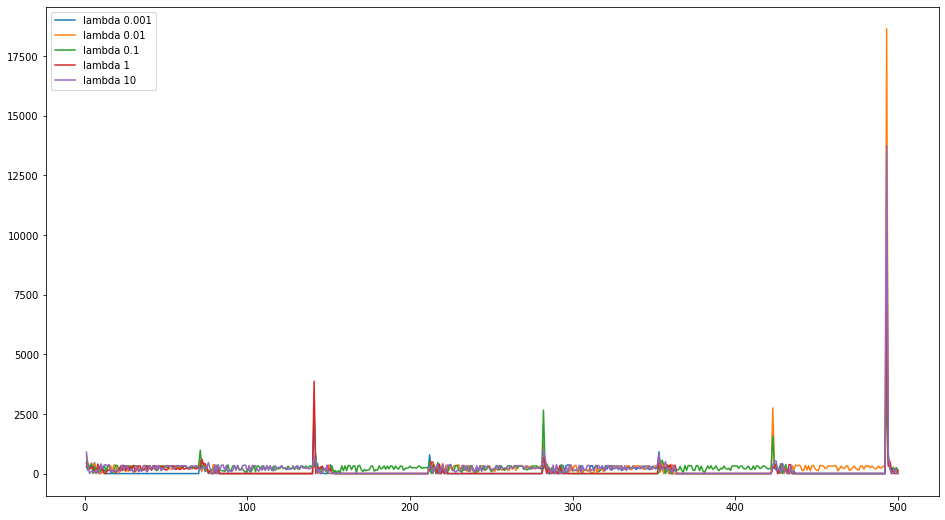

In [24]:
plt.figure(figsize = (16,9))
for i in range(len(obj_fnval_list)):
  plt.plot(x_epochs, obj_fnval_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 4(b) Plot of test set accuracy values for different values of lambda

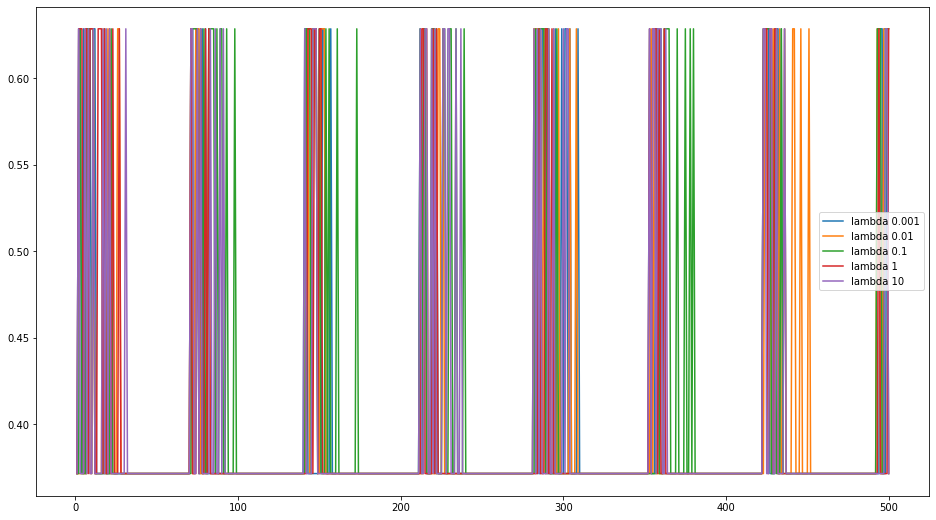

In [25]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_test_list)):
  plt.plot(x_epochs, accuracy_test_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 4(c) Plot of train set accuracy values for different values of lambda

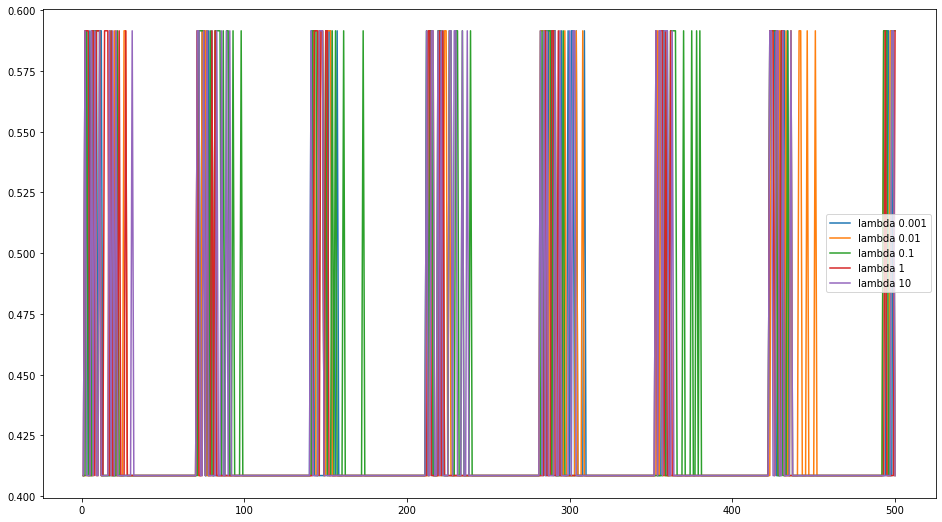

In [26]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_train_list)):
  plt.plot(x_epochs, accuracy_train_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

In [27]:
final_accuracy_train

[0.4084507042253521,
 0.4084507042253521,
 0.5915492957746479,
 0.5915492957746479,
 0.4084507042253521]

In [28]:
final_accuracy_test

[0.37142857142857144,
 0.37142857142857144,
 0.6285714285714286,
 0.6285714285714286,
 0.37142857142857144]

#Ans 4 (d)

Train set accuracy values:

For lambda = 1e-3, 0.408

For lambda = 1e-2, 0.408

For lambda = 0.1, 0.5915

For lambda = 1, 0.5915

For lambda = 10, 0.408

Test set accuracy values:

For lambda = 1e-3, 0.371

For lambda = 1e-2, 0.371

For lambda = 0.1, 0.6285

For lambda = 1, 0.6285

For lambda = 10, 0.3714

#Ans 4(e)

We can see that the curves for all values of lambda are very squiggly in nature and increases rapidly for the largest epoch i.e. 500th. We can see that for lamda = 0.1, 1, we get higher accuracy value. We can also see that the test accuracy is greater than train accuracy in some cases.

One more observation that has been made is the accuracy changes with every random split of data.**bold text**

#Loss Function, $L_l$

In [29]:
def compute_loss_l(w, x, y):
  return np.log(1 + np.exp(np.multiply(-y, np.matmul(w.transpose(), x))))

In [30]:
def compute_objfnval(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_l(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [31]:
def compute_grad_loss_l(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    arr[i] = (lamda/n)*model_w[i] + np.divide((np.multiply((np.exp(np.multiply(-y,np.matmul(model_w,x)))),np.multiply(-y,x[i]))), 1 + (np.exp(np.multiply(-y,np.matmul(model_w,x)))))
  return arr

In [32]:
def OPT2(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = w - np.multiply(step, compute_grad_loss_l(data[i], label[i], w, lamda))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [ ]:
num_epochs = 500
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,501)]
obj_fnval_list = []
accuracy_train_list = []
accuracy_test_list = []
final_accuracy_test = []
final_accuracy_train = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT2(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  accuracy_train_list.append(acc_train)
  accuracy_test_list.append(acc_test)
  final_accuracy_test.append(compute_accuracy(test_data, test_label, model_w))
  final_accuracy_train.append(compute_accuracy(train_data, train_label, model_w))

#Ans 5 :

We get an increasing function of the loss hence we get an error of overflow, so logistic function cannot be applied in this case.

#Loss Function $L_{sh}$

In [34]:
def compute_loss_sh(w, x, y):
  return (max(0, 1 - np.multiply(y, np.matmul(w.transpose(), x)))**2)

In [35]:
def compute_objfnval(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_sh(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [36]:
def compute_grad_loss_sh(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    if compute_loss_sh(model_w, x, y) != 0:
      arr[i] = (lamda/n)*model_w[i] + np.multiply(-2*y*x[i],max(0, 1 - np.multiply(y, np.matmul(model_w.transpose(), x))))
    else:
      arr[i] = (lamda/n)*model_w[i]
  return arr

In [37]:
def OPT3(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = compute_orthogonal_projection(w - np.multiply(step, compute_grad_loss_sh(data[i], label[i], w, lamda)))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [38]:
num_epochs = 500
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,501)]
obj_fnval_list = []
accuracy_train_list = []
accuracy_test_list = []
final_accuracy_test = []
final_accuracy_train = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT3(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  accuracy_train_list.append(acc_train)
  accuracy_test_list.append(acc_test)
  final_accuracy_test.append(compute_accuracy(test_data, test_label, model_w))
  final_accuracy_train.append(compute_accuracy(train_data, train_label, model_w))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in matmul
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in matmul
  


#Ans 5.4(a) Plot of objective function values for different values of lambda

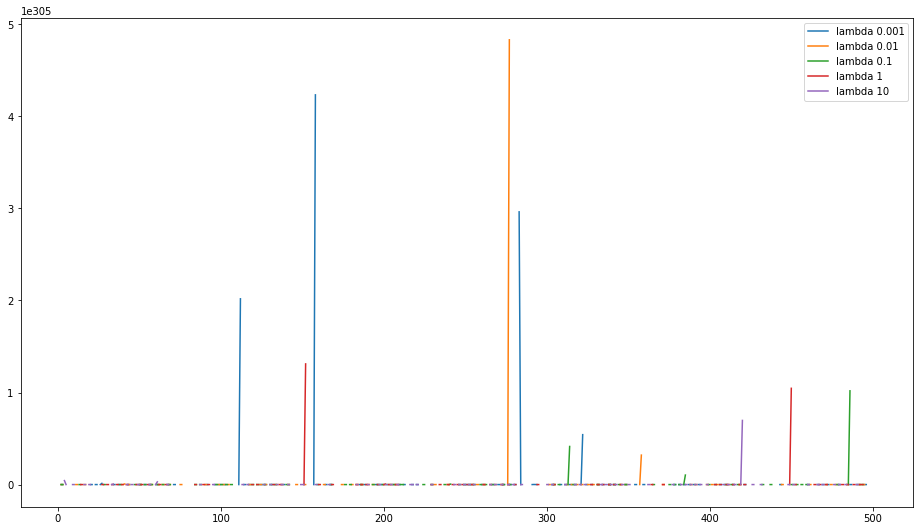

In [39]:
plt.figure(figsize = (16,9))
for i in range(len(obj_fnval_list)):
  plt.plot(x_epochs, obj_fnval_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 5.4(b) Plot of test set accuracy values for different values of lambda

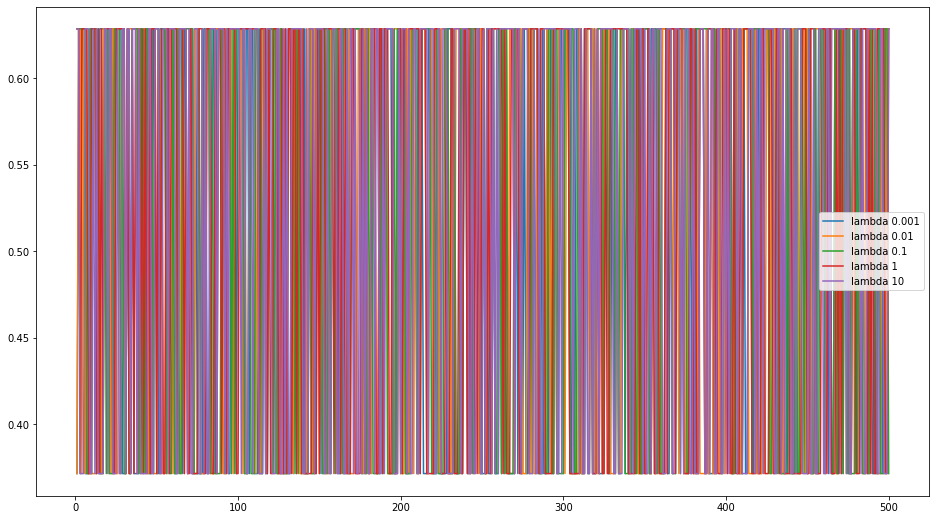

In [40]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_test_list)):
  plt.plot(x_epochs, accuracy_test_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 5.4(c) Plot of train set accuracy values for different values of lambda

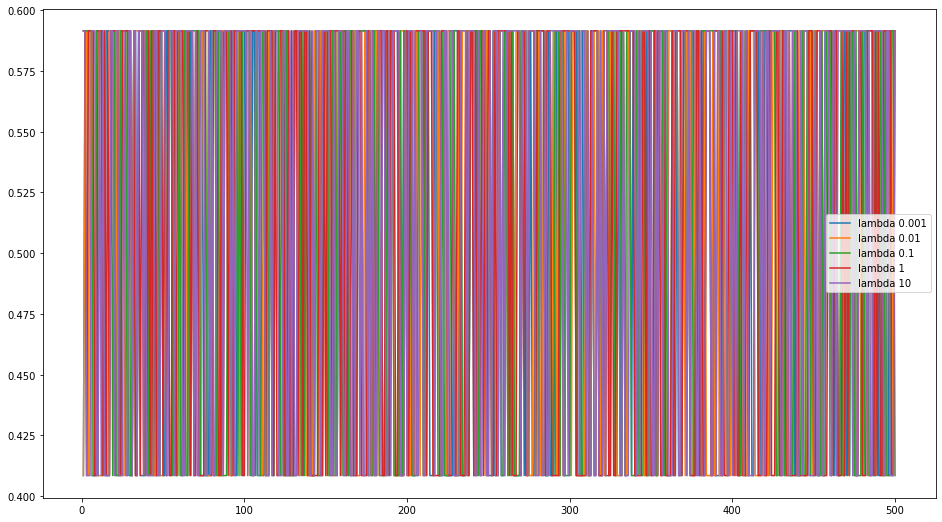

In [41]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_train_list)):
  plt.plot(x_epochs, accuracy_train_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

In [42]:
final_accuracy_train

[0.5915492957746479,
 0.5915492957746479,
 0.4084507042253521,
 0.5915492957746479,
 0.5915492957746479]

In [43]:
final_accuracy_test

[0.6285714285714286,
 0.6285714285714286,
 0.37142857142857144,
 0.6285714285714286,
 0.6285714285714286]

#Ans 5.4 (d)

Train set accuracy values:

For lambda = 1e-3, 0.5915

For lambda = 1e-2, 0.5915

For lambda = 0.1, 0.4084

For lambda = 1, 0.5915

For lambda = 10, 0.5915

Test set accuracy values:

For lambda = 1e-3, 0.6285

For lambda = 1e-2, 0.6285

For lambda = 0.1, 0.3714

For lambda = 1, 0.6285

For lambda = 10, 0.6285

#Ans 5.4(e)

We can see that the objective function value curve rises for some lamdas at some epochs.

We can see that the accuracy curves for all values of lambda lie within a range. We can see that for the largest values of lambda except lamda = 0.1, we get higher accuracy value. We can also see that the test accuracy is greater than train accuracy in some cases.

One more observation that has been made is the accuracy changes with every random split of data.